In [57]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.patches as mpatches
import pandas as pd

In [11]:
fname1 = 'data/normal1-no-memory-lock.txt'
fname2 = 'data/rt1-no-memory-lock.txt'

In [3]:
def read_file(file_name):
    with open(file_name, 'r') as f:
        data = f.readlines()

        data = np.asarray(data)
        data = [float(line) / 1000 for line in data]
    return data

def format_time():
    a = datetime.datetime.now()
    return f"{a.year}-{a.month}-{a.day}_{a.hour}-{a.minute}-{a.second}"

In [30]:
violet = "#332288"
darkgreen = "#117733"
turqoise = "#44AA99"
blue = "#88CCEE"
yellow = "#DDCC77"
red = "#CC6677"
pink = "#AA4499"

In [4]:
bin_width = 0.5

bins = [x * bin_width for x in range(0, 40)][1:]

In [33]:
data1 = read_file(fname1)
data2 = read_file(fname2)
print(f"{len(data1)} {len(data2)}")

4056 3638


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


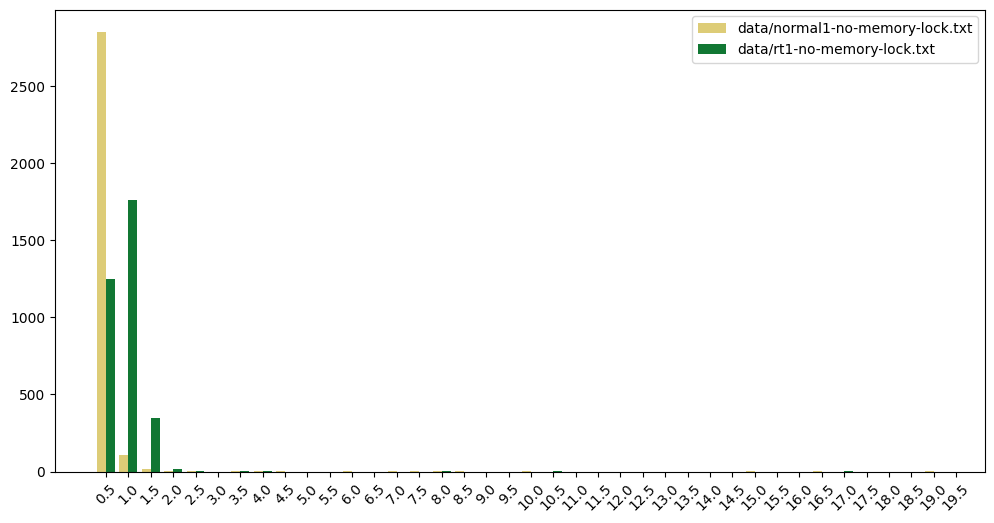

In [32]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)

plt.hist([data1, data2], label=[fname1, fname2], color=[yellow, darkgreen],alpha=1, bins=bins, log=False, align='left')
plt.legend(loc='upper right')
plt.xticks(bins, rotation=45)

t = format_time()
plt.savefig(f"plots/hist-{t}.svg")
plt.savefig(f"plots/hist-{t}.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


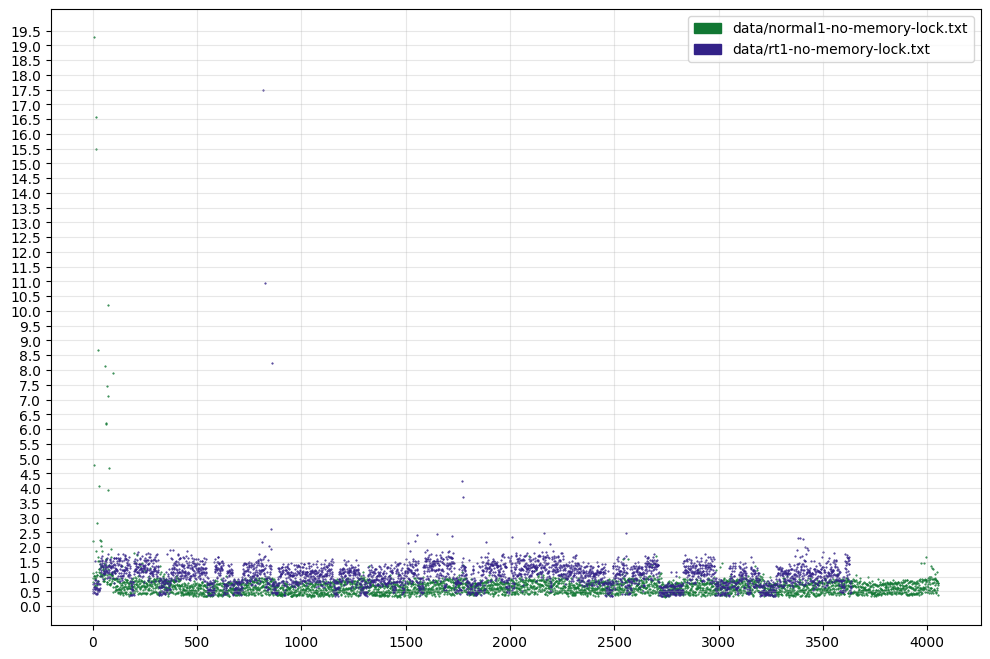

In [68]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

filtered1 = list(filter(lambda x: x < 20, data1))
filtered2 = list(filter(lambda x: x < 20, data2))

patch1 = mpatches.Patch(color=darkgreen, label=fname1)
patch2 = mpatches.Patch(color=violet, label=fname2)

plt.yticks([0] + bins)
plt.grid(alpha=0.3)

plt.scatter(range(0, len(filtered1)), filtered1, label=fname1, color=darkgreen, marker='.', s=1, alpha=1)
plt.scatter(range(0, len(filtered2)), filtered2, label=fname2, color=violet, marker='.', s=1, alpha=1)
plt.legend(loc='upper right', handles=[patch1, patch2])



t = format_time()
plt.savefig(f"plots/scatter-{t}.svg")
plt.savefig(f"plots/scatter-{t}.eps")
plt.show()

In [84]:
indices = ['mean', 'std', 'max', 'index of max', 'min', 'index of min']
columns = ['Normal', 'PREEMPT_RT']
datas = {
    'Normal': data1,
    'PREEMPT_RT': data2
}
df = pd.DataFrame(index=indices, columns=columns)

for key, value in datas.items():
    df[key]["mean"] = np.mean(value)
    df[key]["std"] = np.std(value)
    df[key]["max"] = np.max(value)
    df[key]["index of max"] = np.argmax(value)
    df[key]["min"] = np.min(value)
    df[key]["index of min"] = np.argmin(value)

df

,Normal,PREEMPT_RT
mean,0.703633,1.091296
std,1.640721,1.378523
max,97.963,78.747
index of max,0,0
min,0.3,0.334
index of min,1461,3267
